In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D3.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,0.0,3.4399999999999999,0.44000000000000039,4.387545011044053
0,0.040404,0.134949,0.888485,2.679650
1,0.080808,0.829899,1.336970,2.968490
2,0.121212,1.524848,1.785455,3.254065
3,0.161616,2.219798,2.233939,3.536375
4,0.202020,2.914747,2.682424,3.815420


In [3]:
M=len(df)
M

99

In [4]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1]
x3 = df.values[:, 2]
y = df.values[:, 3] # get output values from third column for "Y" output
m = len(y) # Number of training examples

print('x1 = ', x1[: 5]) 
print('x2 = ', x2[: 5]) 
print('x3 = ', x3[: 5]) 
print('Y = ', y[: 5]) 
print('m = ', m)

x1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
x2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
x3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


# Problem 2 (25 points)

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

1. Report the final linear model you found the best. 
2. Plot loss over the iteration.
3. Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
4. Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)
 

Text(0.5, 1.0, 'Scatter plot of explanatory varibale x1')

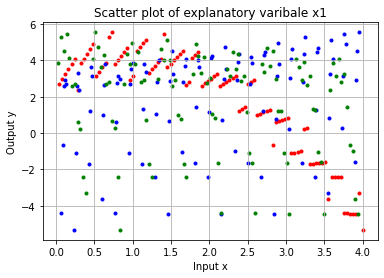

In [5]:
plt.scatter(x1, y, color='red', marker='.')
plt.scatter(x2, y, color='blue', marker='.')
plt.scatter(x3, y, color='green', marker='.')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input x')
plt.ylabel('Output y')
plt.title('Scatter plot of explanatory varibale x1')

In [6]:
def compute_cost(x, y, theta):
    predictions = x.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

def gradient_descent(x, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * x.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(x, y, theta)
    return theta, cost_history

In [9]:
x1_0 = np.ones((m, 1))
x1_1 = x1.reshape(m, 1)
x1 = np.hstack((x1_0, x1_1))
theta_x1 = np.zeros(2)

x2_0 = np.ones((m, 1))
x2_1 = x2.reshape(m, 1)
x2 = np.hstack((x2_0, x2_1))
theta_x2 = np.zeros(2)

x3_0 = np.ones((m, 1))
x3_1 = x3.reshape(m, 1)
x3 = np.hstack((x3_0, x3_1))
theta_x3 = np.zeros(2)

In [10]:
cost_x1 = compute_cost(x1, y, theta_x1)
print('Cost for given values of theta_0 and theta_1 =', cost_x1)

Cost for given values of theta_0 and theta_1 = 5.483015861682611


In [11]:
theta_x1 = [0., 0.]
iterations_x1 = 1500;
alpha_x1 = 0.01;
theta_x1, cost_history_x1 = gradient_descent(x1, y, theta_x1, alpha_x1, iterations_x1)

theta_x2 = [0., 0.]
iterations_x2 = 1500;
alpha_x2 = 0.01;
theta_x2, cost_history_x2 = gradient_descent(x2, y, theta_x2, alpha_x2, iterations_x2)

theta_x3 = [0., 0.]
iterations_x3 = 1500;
alpha_x3 = 0.01;
theta_x3, cost_history_x3 = gradient_descent(x3, y, theta_x3, alpha_x3, iterations_x3)

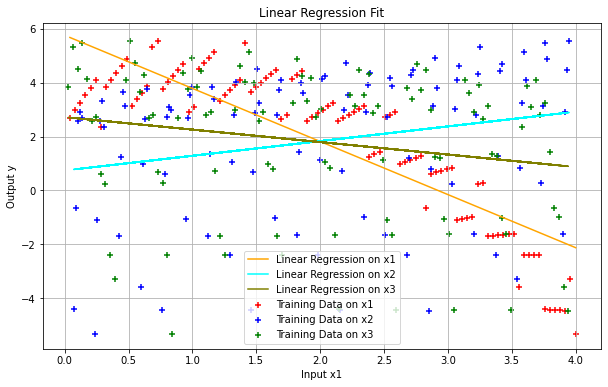

In [12]:
plt.scatter(x1[:,1], y, color='red', marker= '+', label= 'Training Data on x1')
plt.scatter(x2[:,1], y, color='blue', marker= '+', label= 'Training Data on x2')
plt.scatter(x3[:,1], y, color='green', marker= '+', label= 'Training Data on x3')
plt.plot(x1[:,1], x1.dot(theta_x1), color='orange', label='Linear Regression on x1')
plt.plot(x2[:,1], x2.dot(theta_x2), color='cyan', label='Linear Regression on x2')
plt.plot(x3[:,1], x3.dot(theta_x3), color='olive', label='Linear Regression on x3')
plt.rcParams["figure.figsize"] = (10,10)
plt.grid()
plt.xlabel('Input x1')
plt.ylabel('Output y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

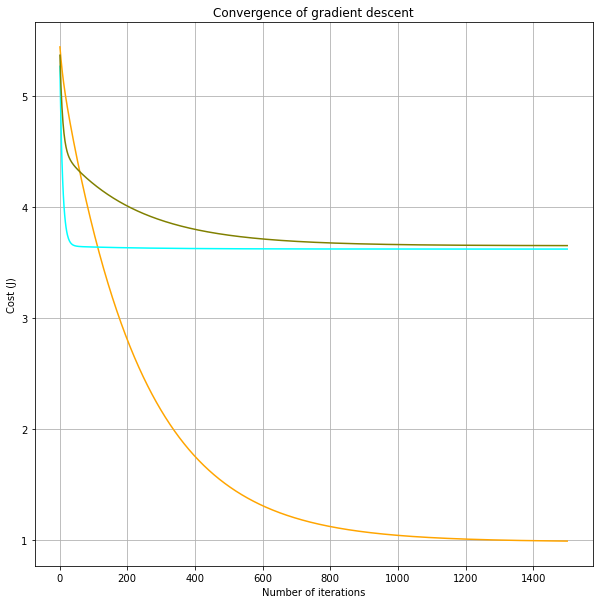

In [13]:
plt.plot(range(1, iterations_x1 + 1), cost_history_x1, color='orange')
plt.plot(range(1, iterations_x2 + 1), cost_history_x2, color='cyan')
plt.plot(range(1, iterations_x3 + 1), cost_history_x3, color='olive')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

#### Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [14]:
x1_pred1 = 1
x2_pred1 = 1
x3_pred1 = 1

h_x_pred1 = theta_x1*x1_pred1 + theta_x2*x2_pred1 + theta_x3*x3_pred1
h_x_pred1

array([ 9.21623705, -1.88884559])

In [15]:
x1_pred2 = 2
x2_pred2 = 0
x3_pred2 = 4

h_x_pred2 = theta_x1*x1_pred2 + theta_x2*x2_pred2 + theta_x3*x3_pred2
h_x_pred2 

array([22.39279129, -5.79429889])

In [16]:
x1_pred3 = 3
x2_pred3 = 2
x3_pred3 = 1

h_x_pred3 = theta_x1*x1_pred3 + theta_x2*x2_pred3 + theta_x3*x3_pred3
h_x_pred3

array([21.47057078, -5.28583444])